<img src="../src/packt-banner.png" alt="">

#  Predictive Analytics of UNHCR Forced Migration

In this workbook you will find:
- Techniques for machine learning
- Recipes to train and evaluate classification models
---

In [253]:
# Import Libraries
import pandas as pd
import numpy as np
import datetime
import time
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set plot appearance
# See here for more options: https://matplotlib.org/users/customizing.html

%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

In [104]:
%load_ext version_information
%version_information pandas, numpy, matplotlib, seaborn, sklearn

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.7.6 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.12.0
OS Windows 10 10.0.18362 SP0
pandas 1.0.1
numpy 1.18.1
matplotlib 3.1.3
seaborn 0.10.0
sklearn 0.22.1
Sun Apr 05 11:35:32 2020 Bangladesh Standard Time

---

## Preparing to train a predictive model to tell us populations of people that will forcefully migrate from a country with natural/man-made disaster or terrorism incidents to a destination country

---
#### Building training data sets

In [105]:
# Read aggregated refugee and disaster data
file_name = 'C:/Users/umar.galadima.shehu/Downloads/UNHCR Data.csv'v
of = pd.read_csv(file_name, encoding='latin1')
of.shape

(9842, 219)


The UNHCR Data we have used in this exercise includes Forced migration data aggregated with data from Global Terrorism dataset and Global Disaster database.

In [189]:
#replace all nulls with 0s
df = of
df = df.fillna(value=0)


What if we consider Refugee destination USA?

In [190]:
target = 'United States of America'

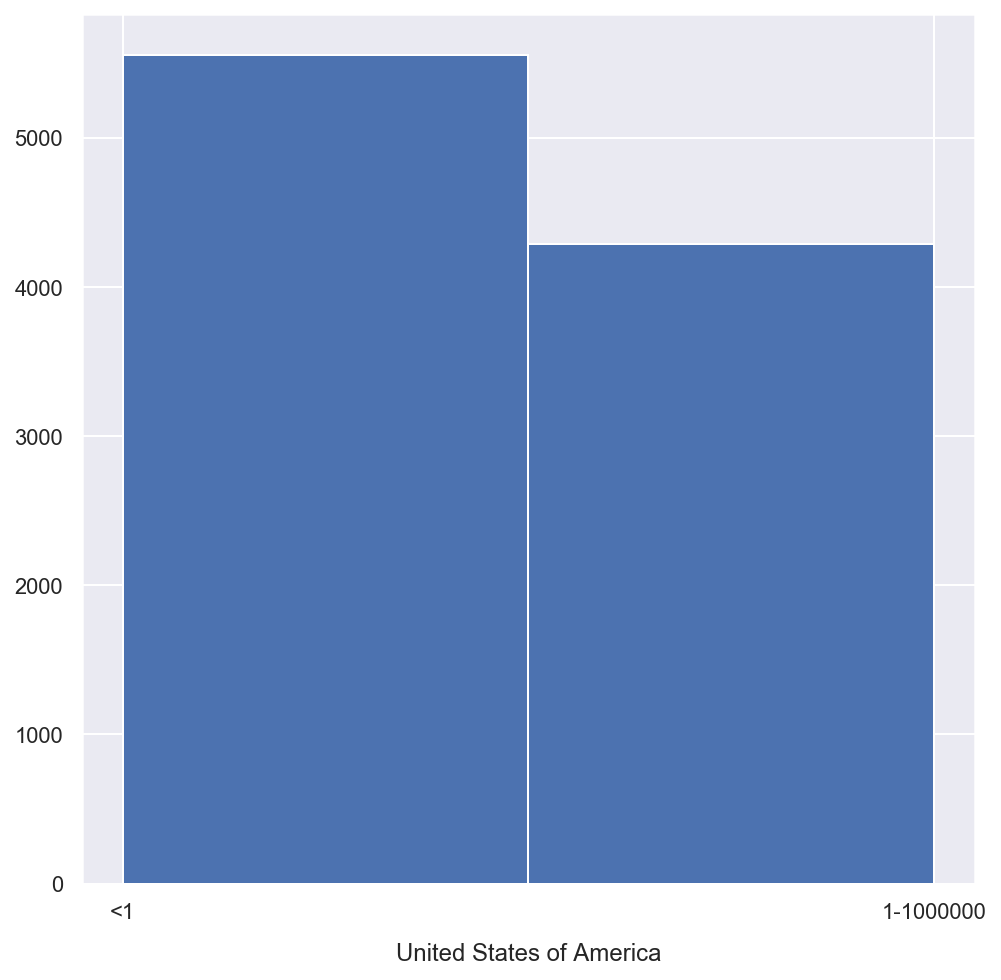

In [191]:
# Print the distibution of target

try:
        fig = plt.figure()
        num_bins = min((30, len(df[target].unique())))
        df[target].hist(bins=num_bins)
        plt.xlabel(target)
except TypeError:
        print()
        print(df[target].value_counts())
        print('-'*30)
        plt.close()    

Notice that the dataset is well balanced

In [192]:
# How is it distributed?

df[target].value_counts()

<1           5554
1-1000000    4288
Name: United States of America, dtype: int64

In [193]:
# Encode ordinal labels of target

from sklearn.preprocessing import LabelEncoder
rating_encoder = LabelEncoder()

column = ['Disaster Origin',target]

for i in column:
    
        df[i] = rating_encoder.fit_transform(df[i])
df

,Disaster Year,Disaster Origin,occurrence,Total deaths,Injured,Affected,Homeless,Total affected,Total damage ('000 US$),Migration Year,...,Migration Occurred,Disaster Occurred,Total Refugees Migrated,Terrorism Year,Terrorism Location,Success,Killed,Wounded,Property Value,Terrorism Occurred
0,1954,0,1,2000,0,0.0,0,0,0.0,1954,...,0,1,0,1954,Afghanistan,0,0,0,0.0,0
1,1956,0,2,151,2000,0.0,0,2000,25000.0,1956,...,0,1,0,1956,Afghanistan,0,0,0,0.0,0
2,1963,0,1,107,0,0.0,0,0,0.0,1963,...,0,1,0,1963,Afghanistan,0,0,0,0.0,0
3,1964,0,1,74,0,400.0,0,400,0.0,1964,...,0,1,0,1964,Afghanistan,0,0,0,0.0,0
4,1969,0,1,0,0,48000.0,0,48000,200.0,1969,...,0,1,0,1969,Afghanistan,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837,2015,280,3,34,57,0.0,475,532,0.0,2015,...,1,1,78901,2015,Zimbabwe,0,0,0,0.0,0
9838,2016,280,2,61,36,2000.0,0,2036,0.0,2016,...,1,1,61458,2016,Zimbabwe,0,0,0,0.0,0
9839,2017,280,3,315,148,100000.0,12895,113043,189000.0,2017,...,0,1,0,2017,Zimbabwe,3,0,1,-297.0,1
9840,2018,280,3,101,5164,0.0,0,5164,0.0,2018,...,0,1,0,2018,Zimbabwe,0,0,0,0.0,0


In [194]:
# Split into training and testing sets

features = ['Disaster Origin',
'occurrence',
'Total deaths',
'Injured',
'Affected',
'Homeless',
'Total affected',
"Total damage  ('000 US$)",
'Success',
'Killed',
'Wounded',
'Property Value',
'Terrorism Occurred'           
            
]
X = df[features].values


y = df[target].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3)
    
print('         shape')
print('--------------')
print('X_train', X_train.shape)
print('X_test ', X_test.shape)
print('y_train', y_train.shape)
print('y_test ', y_test.shape)

         shape
--------------
X_train (6889, 13)
X_test  (2953, 13)
y_train (6889,)
y_test  (2953,)


---
### Assess the Data

---

In [195]:
# How much missing data?

df[target].isnull().sum()

0

---
Assess the features

In [196]:
# How many NaNs?

df.isnull().sum() / len(df) * 100

Disaster Year         0.0
Disaster Origin       0.0
occurrence            0.0
Total deaths          0.0
Injured               0.0
                     ... 
Success               0.0
Killed                0.0
Wounded               0.0
Property Value        0.0
Terrorism Occurred    0.0
Length: 219, dtype: float64

In [197]:
# Make sure we are all clear of NaNs

assert df.isnull().sum().sum() == 0

---
## Training classification models   
We train SVMs, random forests and K-nearest neighbors classification models on the UNHCR Data.

---

In [198]:
# Set default figure size

plt.rcParams['figure.figsize'] = (8, 8)

In [200]:
# Scale the data for SVMs and K-Nearest Neighbors

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [201]:
# Train a support vector machine classifier

from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(X_train_std, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [202]:
# What is the classification accuracy?

from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
print('accuracy = {:.1f}%'.format(acc*100))

accuracy = 63.4%


In [203]:
# What is the accuracy by class?

from sklearn.metrics import confusion_matrix

print('percent accuracy score per class:')
cmat = confusion_matrix(y_test, y_pred)
scores = cmat.diagonal() / cmat.sum(axis=1) * 100
print(target+' = 1-1000000 : {:.2f}%'.format(scores[0]))
print(target+' = <1 : {:.2f}%'.format(scores[1]))


percent accuracy score per class:
United States of America = 1-1000000 : 39.48%
United States of America = <1 : 82.64%


In [204]:
# Train a kernel SVM

svm = SVC(kernel='rbf', C=1, random_state=1)
svm.fit(X_train_std, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [205]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from IPython.display import display
from mlxtend.plotting import plot_decision_regions

def check_model_fit(clf, X_test, y_test):
    # Print overall test-set accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred, normalize=True) * 100
    print('total accuracy = {:.1f}%'.format(acc))
    
    # Print confusion matrix
    cmat = confusion_matrix(y_test, y_pred)
    cols = pd.MultiIndex.from_tuples([('predictions', 0), ('predictions', 1)])
    indx = pd.MultiIndex.from_tuples([('actual', 0), ('actual', 1)])
    display(pd.DataFrame(cmat, columns=cols, index=indx))
    print()
    
    # Print test-set accuracy grouped by the target variable 
    print('percent accuracy score per class:')
    cmat = confusion_matrix(y_test, y_pred)
    scores = cmat.diagonal() / cmat.sum(axis=1) * 100
    
    print(target+' = 1-1000000 : {:.2f}%'.format(scores[0]))
    print(target+' = <1 : {:.2f}%'.format(scores[1]))

    print()
    

In [206]:
check_model_fit(svm, X_test_std, y_test)

total accuracy = 63.3%


predictions      
                   0     1
actual 0         520   797
       1         286  1350


percent accuracy score per class:
United States of America = 1-1000000 : 39.48%
United States of America = <1 : 82.52%



In [207]:
# Load the K-Nearest Neighbors class

from sklearn.neighbors import KNeighborsClassifier

In [208]:
# Train a K-Nearest Neighbors model

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)

check_model_fit(knn, X_test_std, y_test)


total accuracy = 72.9%


predictions      
                   0     1
actual 0         922   395
       1         404  1232


percent accuracy score per class:
United States of America = 1-1000000 : 70.01%
United States of America = <1 : 75.31%



In [209]:
# Increase the number of "nearest neighbors" to reduce overfitting

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_std, y_train)

check_model_fit(knn, X_test_std, y_test)


total accuracy = 74.1%


predictions      
                   0     1
actual 0         987   330
       1         436  1200


percent accuracy score per class:
United States of America = 1-1000000 : 74.94%
United States of America = <1 : 73.35%



In [210]:
# Train a Random Forest

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=50, max_depth=5,
                                random_state=1)
forest.fit(X_train, y_train)

check_model_fit(forest, X_test, y_test)


total accuracy = 69.8%


predictions      
                   0     1
actual 0         932   385
       1         508  1128


percent accuracy score per class:
United States of America = 1-1000000 : 70.77%
United States of America = <1 : 68.95%



Notice that KNN and Random Forests have a prediction accuracy 70% on the training dataset which is very significant for our purpose

---
###  K-fold cross validation and validation curves

---

In [211]:
# Instantiate the model

clf = RandomForestClassifier(n_estimators=100, max_depth=5)

In [212]:
# Stratified k-fold cross validation

from sklearn.model_selection import cross_val_score

np.random.seed(1)
scores = cross_val_score(
            estimator=clf,
            X=X,
            y=y,
            cv=10)

print('accuracy = {:.3f} +/- {:.3f}'.format(scores.mean(), scores.std()))

accuracy = 0.656 +/- 0.085


In [213]:
scores

array([0.45786802, 0.64162437, 0.68089431, 0.69105691, 0.7804878 ,
       0.6351626 , 0.74898374, 0.61788618, 0.70020325, 0.60873984])

In [214]:
# Custom function for class accuracies

from sklearn.model_selection import StratifiedKFold

def cross_val_class_score(clf, X, y, cv=10):
    kfold = StratifiedKFold(n_splits=cv)\
                .split(X, y)

    class_accuracy = []
    for k, (train, test) in enumerate(kfold):
        clf.fit(X[train], y[train])
        y_test = y[test]
        y_pred = clf.predict(X[test])
        cmat = confusion_matrix(y_test, y_pred)
        class_acc = cmat.diagonal()/cmat.sum(axis=1)
        class_accuracy.append(class_acc)
        print('fold: {:d} accuracy: {:s}'.format(k+1, str(class_acc)))
        
    return np.array(class_accuracy)

In [215]:
# Stratified k-fold cross validation

np.random.seed(1)
scores = cross_val_class_score(clf, X, y)

print('accuracy = {} +/- {}'.format(scores.mean(axis=0), scores.std(axis=0)))

fold: 1 accuracy: [0.96969697 0.06294964]
fold: 2 accuracy: [0.64801865 0.63669065]
fold: 3 accuracy: [0.73130841 0.64208633]
fold: 4 accuracy: [0.67523364 0.70323741]
fold: 5 accuracy: [0.77622378 0.78378378]
fold: 6 accuracy: [0.61072261 0.65405405]
fold: 7 accuracy: [0.6993007  0.78738739]
fold: 8 accuracy: [0.7039627  0.55135135]
fold: 9 accuracy: [0.75990676 0.65405405]
fold: 10 accuracy: [0.10955711 0.99459459]
accuracy = [0.66839313 0.64701893] +/- [0.20809865 0.22647218]


In [216]:
# Calcualte a validation curve

from sklearn.model_selection import validation_curve

clf = RandomForestClassifier(n_estimators=10)


max_depths = np.arange(3, 16, 3)

train_scores, test_scores = validation_curve(
            estimator=clf,
            X=X,
            y=y,
            param_name='max_depth',
            param_range=max_depths,
            cv=10);

In [217]:
# Function to draw the validation curve

def plot_validation_curve(train_scores, test_scores,
                          param_range, xlabel='', log=False):
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    fig = plt.figure()
    
    plt.plot(param_range, train_mean, 
             color=sns.color_palette('Set1')[1], marker='o', 
             markersize=5, label='training accuracy')

    plt.fill_between(param_range, train_mean + train_std,
                     train_mean - train_std, alpha=0.15,
                     color=sns.color_palette('Set1')[1])

    plt.plot(param_range, test_mean, 
             color=sns.color_palette('Set1')[0], linestyle='--', 
             marker='s', markersize=5, 
             label='validation accuracy')

    plt.fill_between(param_range, 
                     test_mean + test_std,
                     test_mean - test_std, 
                     alpha=0.15, color=sns.color_palette('Set1')[0])

    if log:
        plt.xscale('log')
    plt.legend(loc='lower right')
    if xlabel:
        plt.xlabel(xlabel)
    plt.ylabel('Accuracy')
    plt.ylim(0.9, 1.0)
    return fig

(0.4, 1.0)

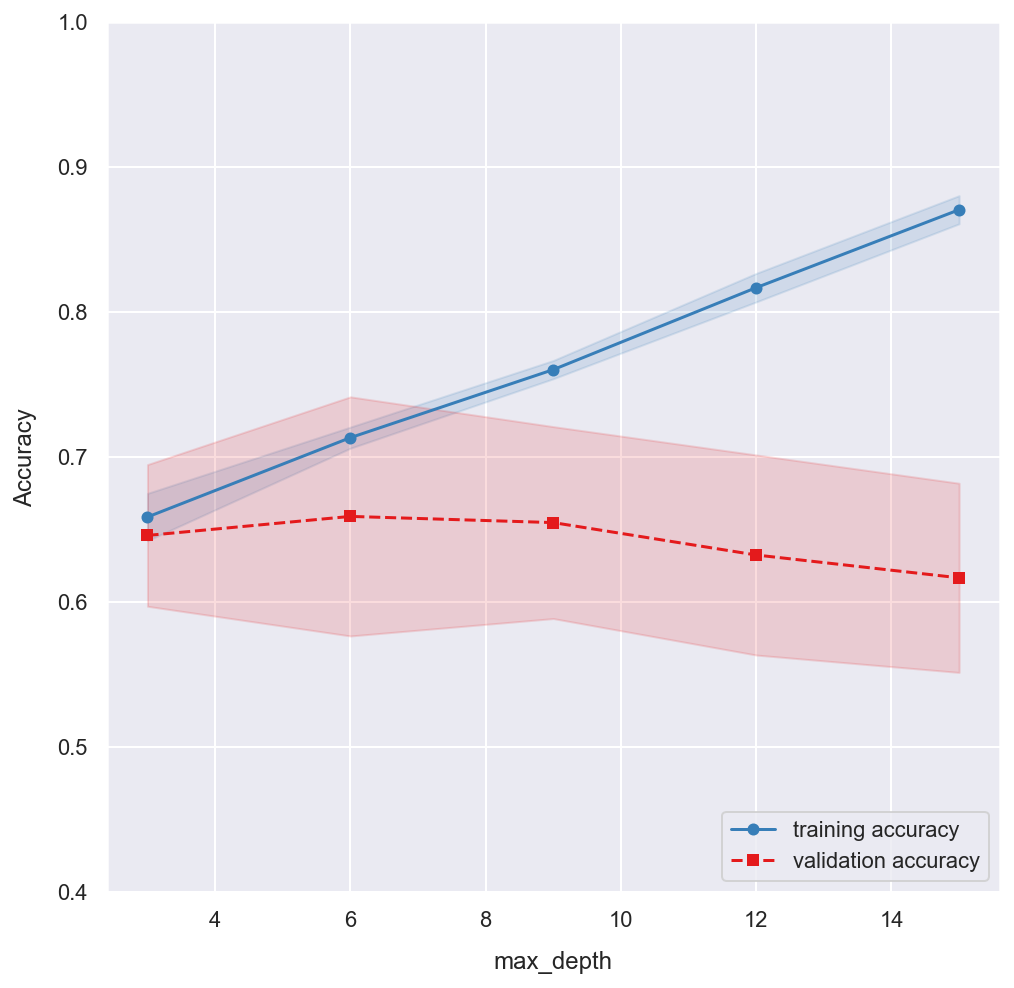

In [219]:
plot_validation_curve(train_scores, test_scores,
                      max_depths, xlabel='max_depth')
plt.ylim(0.4, 1.0)


Notice that the accuracy of the Random forest model on the validation dataset peaks at 65% which is not bad at all!. Perhaps further feature engineering on the dataset should improve accuracy of the model

---
### Training a predictive model for the problem

---

In [220]:
%%time
# Calculate a validation curve for max_depth
# using a Random Forest classifier

np.random.seed(1)
clf = RandomForestClassifier(n_estimators=20)
max_depths = [3, 4, 5, 6, 7,
              9, 12, 15, 18, 21, 24, 27, 30]
print('Training {} models ...'.format(len(max_depths)))
train_scores, test_scores = validation_curve(
            estimator=clf,
            X=X,
            y=y,
            param_name='max_depth',
            param_range=max_depths,
            cv=5);

Training 13 models ...
Wall time: 7 s


(0.4, 1.0)

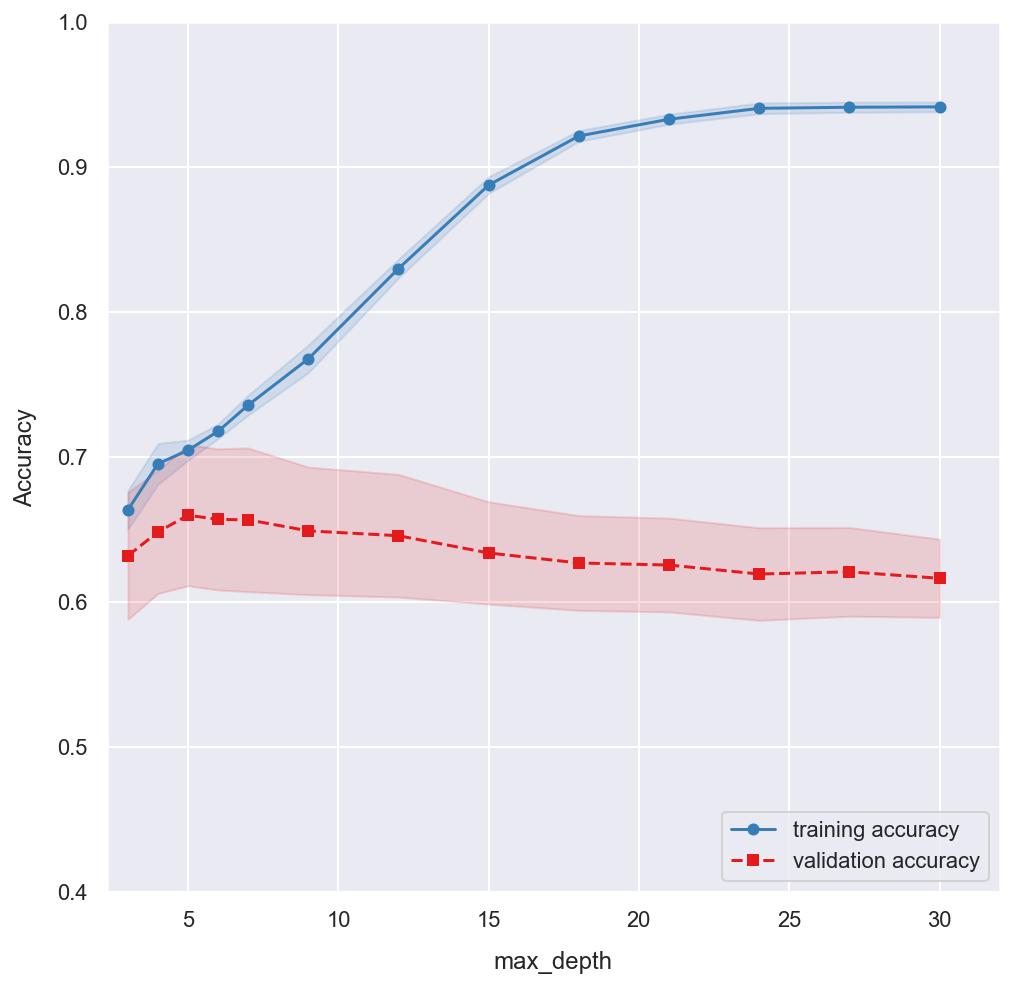

In [221]:
# Draw the validation curve

plot_validation_curve(train_scores, test_scores,
                      max_depths, xlabel='max_depth')
plt.xlim(2.3, 32)
plt.ylim(0.4, 1.0)


AS seem from the curve above, the best maximum depths are five or six which we will use going forward

In [222]:
# Show k-fold results for the selected model:
# a random forest with max_depth = 6 and n_estimators = 200

np.random.seed(1)
clf = RandomForestClassifier(n_estimators=200, max_depth=6)
scores = cross_val_class_score(clf, X, y)

print('accuracy = {} +/- {}'.format(scores.mean(axis=0), scores.std(axis=0)))

fold: 1 accuracy: [0.95104895 0.12589928]
fold: 2 accuracy: [0.64801865 0.64028777]
fold: 3 accuracy: [0.72429907 0.64568345]
fold: 4 accuracy: [0.66588785 0.71402878]
fold: 5 accuracy: [0.76689977 0.78738739]
fold: 6 accuracy: [0.60606061 0.65225225]
fold: 7 accuracy: [0.68065268 0.7963964 ]
fold: 8 accuracy: [0.68997669 0.56216216]
fold: 9 accuracy: [0.75058275 0.64864865]
fold: 10 accuracy: [0.05594406 0.9981982 ]
accuracy = [0.65393711 0.65709443] +/- [0.2184961  0.21158036]


Text(0, 0.5, 'Accuracy')

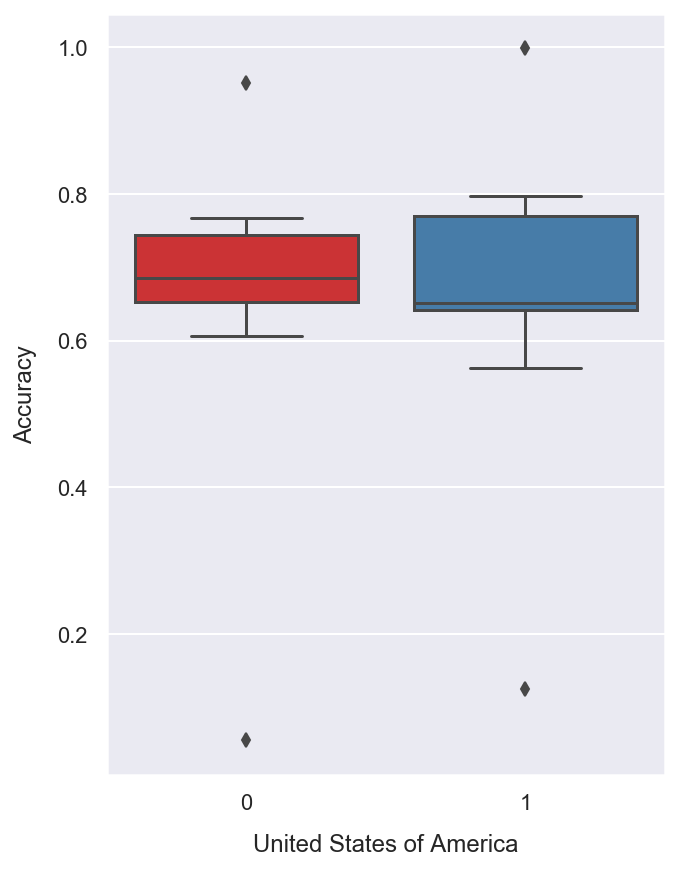

In [223]:
# Box plot of result

fig = plt.figure(figsize=(5, 7))
sns.boxplot(data=pd.DataFrame(scores, columns=[0, 1]),
            palette=sns.color_palette('Set1'))
plt.xlabel(''+target+'')
plt.ylabel('Accuracy')


In [224]:
# Access feature importances

d = (clf.feature_importances_, df.columns)
list(zip(*d))

[(0.09032433713660665, 'Disaster Year'),
 (0.22146407051115571, 'Disaster Origin'),
 (0.08098454392862216, 'occurrence'),
 (0.028141873838681948, 'Total deaths'),
 (0.031834524438500114, 'Injured'),
 (0.008154543625125524, 'Affected'),
 (0.05358848621437696, 'Homeless'),
 (0.022242657128138152, 'Total affected'),
 (0.10956242833377383, "Total damage  ('000 US$)"),
 (0.06502419974951555, 'Migration Year'),
 (0.08369044326369836, 'Refugee Origin'),
 (0.11508995749508652, 'Iran (Islamic Rep. of)'),
 (0.08989793433671853, 'Pakistan')]

Text(0.5, 0, 'Feature importance')

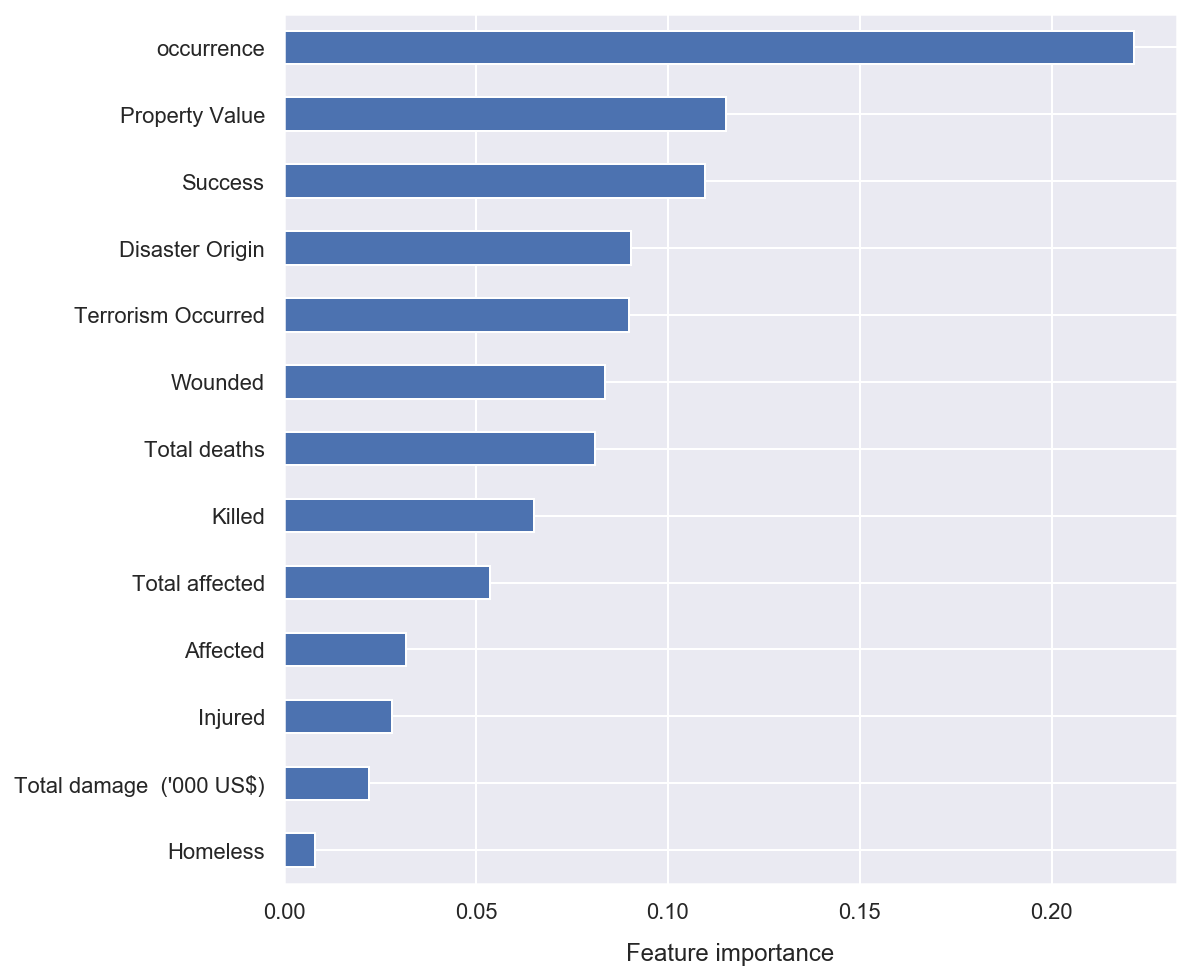

In [225]:
# Visualize the feature importances

pd.Series(clf.feature_importances_, name='Feature importance',
            index=df[features].columns)\
    .sort_values()\
    .plot.barh()
plt.xlabel('Feature importance')


From the chart above, the most impactful variables that determine population of individuals that will forcefully migrate from any country of disaster and/or terrorism to USA are NUMBER OF OCCURENCE OF A DISASTER, VALUE OF PROPERTY DAMAGED FROM A TERRORISM ATTACK, NUMBER OF SUCCESSFUL TERRORISM ATTACKS AND COUNTRY WHERE DISASTER/TERRORISM HAS OCCURRED

In [226]:
# Print all the features with low importance

importances = list(pd.Series(clf.feature_importances_, index=df[features].columns)\
        .sort_values(ascending=False).index)

np.array(importances[5:])V

array(['Wounded', 'Total deaths', 'Killed', 'Total affected', 'Affected',
       'Injured', "Total damage  ('000 US$)", 'Homeless'], dtype='<U24')

The features above have very little impact on forceful migration so we will remove them from our dataset using Principal Component Analysis

In [227]:
# Reduce the one-hot-encoded features with PCA

from sklearn.decomposition import PCA

pca_features = ['Wounded', 'Total deaths', 'Killed', 'Total affected', 'Affected',
       'Injured', "Total damage  ('000 US$)", 'Homeless']

X_reduce = df[pca_features]

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_reduce)

In [229]:
# Add principal components to df

df['first_principle_component'] = X_pca.T[0]
df['second_principle_component'] = X_pca.T[1]
df['third_principle_component'] = X_pca.T[2]

In [230]:
# Select reduced-dimension feature set

features = ['Disaster Origin',
            'occurrence',
            'Success',
            'Property Value',
            'Terrorism Occurred', 
            'first_principle_component',
            'second_principle_component',
            'third_principle_component']

X = df[features].values
y = df[target].values

In [231]:
# Show k-fold results for the selected model with reduced dimensionality:
# a random forest with max_depth = 6 and n_estimators = 200

np.random.seed(1)
clf = RandomForestClassifier(n_estimators=200, max_depth=6)
scores = cross_val_class_score(clf, X, y)

print('accuracy = {} +/- {}'.format(scores.mean(axis=0), scores.std(axis=0)))

fold: 1 accuracy: [0.95337995 0.08093525]
fold: 2 accuracy: [0.66200466 0.63669065]
fold: 3 accuracy: [0.71028037 0.64568345]
fold: 4 accuracy: [0.67990654 0.70323741]
fold: 5 accuracy: [0.77156177 0.78198198]
fold: 6 accuracy: [0.61771562 0.64504505]
fold: 7 accuracy: [0.68764569 0.78558559]
fold: 8 accuracy: [0.68764569 0.56576577]
fold: 9 accuracy: [0.74125874 0.65045045]
fold: 10 accuracy: [0.03496503 1.        ]
accuracy = [0.65463641 0.64953756] +/- [0.22399705 0.22187505]


Text(0, 0.5, 'Accuracy')

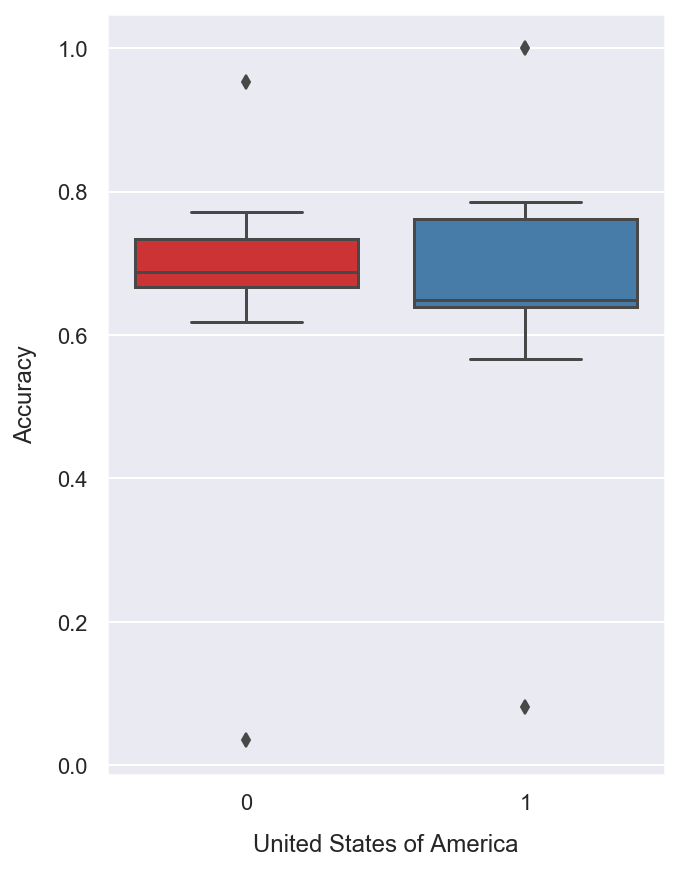

In [232]:
# Box plot of result

fig = plt.figure(figsize=(5, 7))
sns.boxplot(data=pd.DataFrame(scores, columns=[0, 1]),
            palette=sns.color_palette('Set1'))
plt.xlabel(''+target+'')
plt.ylabel('Accuracy')


In [233]:
# Train the final model on all the samples

np.random.seed(1)
clf = RandomForestClassifier(n_estimators=200, max_depth=6)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [234]:
# Save the model

from sklearn.externals import joblib
joblib.dump(clf, target+'_random-forest-trained.pkl')

C:\Users\umar.galadima.shehu\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['United States of America_random-forest-trained.pkl']

In [235]:
# Load model from pkl file

clf = joblib.load(target+'_random-forest-trained.pkl')
clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Now let us consider and example of using the model for a specific Disaster Country like Afghanistan

In [244]:
# Example of using the model for a specific Disaster Country

Afghanistan = df.iloc[45]   
X = Afghanistan[features]
X

Disaster Origin                         0
occurrence                              9
Success                              1627
Property Value                     637630
Terrorism Occurred                      1
first_principle_component    -1.06681e+06
second_principle_component        -301658
third_principle_component         70234.6
Name: 45, dtype: object

#### Lets Consider migrants from Afghanistan to discover what number of population will migrate to USA based on the number of disaster occurences in Afghanistan, Total value of Property of Terrorist attacks and number of successfully terrorist attacks carried out in Afghanistan.

In [245]:
# Predict the class label for USA

clf.predict([X])

array([0])

#### Zero  means no Afghanistani will Migrate to the USA if Terrorism and Disaster has occurred under the parameters above.

In [246]:
# Predict the probability of class labels for Afghanistan

clf.predict_proba([X])

array([[0.76333828, 0.23666172]])

In [249]:
X

Disaster Origin                         0
occurrence                              9
Success                              1627
Property Value                     637630
Terrorism Occurred                      1
first_principle_component    -1.06681e+06
second_principle_component        -301658
third_principle_component         70234.6
Name: 45, dtype: object

#### The Model's probability of certainty that NO Afghanistani will migrate under such conditions is 76%. Testing other values will give us a better idea of under which conditions people will migrate to USA from Afghanistan.

#### What if we assume that No terrorism and Disaster incident occurred in Afghanistan while keeping other variables constant?

In [251]:
X['occurrence'] = 0
X['Terrorism Occurred'] = 0
clf.predict_proba([X])

array([[0.47408832, 0.52591168]])

In [252]:
clf.predict([X])

array([1])

#### Notice now that, keeping other variables constant, the Model tells us that one to one million people from Afghanistan will migrate to the USA if NO Terrorism and Disaster Occurs in Afghanistan. Also, notice that its certainty for the occurence is 52%, It also believes that there is 47% chance that forced migration will NOT occur to USA if there is NO Terrorism and Disaster in Afghanistan

#### In this example, it is obvious that some Terrorism and Disaster variables have significant nfluence on people migrating from Afghanistan to the USA, although this can be further investigated as to why and under what conditions.